# Load Libraries

In [92]:
import numpy as np # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)
📌 Objective: Understand the dataset, identify patterns, clean data.

✅ Steps:

Load dataset and check for missing values.

Analyze the distribution of each feature.

Check for outliers using boxplots and histograms.

Identify categorical and numerical variables.

Perform correlation analysis between features.

Analyze class distribution (target column balance).


In [93]:
# load dataset
df = pd.read_csv("D:\Data Science\Project\loan_data.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [94]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [95]:
# 1st 10 rows
df.head(10) 

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [96]:
df.tail(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44990,31.0,male,Master,136832.0,9,RENT,12319.0,PERSONAL,16.92,0.09,7.0,722,No,1
44991,24.0,male,High School,37786.0,0,MORTGAGE,13500.0,EDUCATION,13.43,0.36,4.0,612,No,1
44992,23.0,female,Bachelor,40925.0,0,RENT,9000.0,PERSONAL,11.01,0.22,4.0,487,No,1
44993,27.0,female,High School,35512.0,4,RENT,5000.0,PERSONAL,15.83,0.14,5.0,505,No,1
44994,24.0,female,Associate,31924.0,2,RENT,12229.0,MEDICAL,10.70,0.38,4.0,678,No,1
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [97]:
# shape of data
df.shape 
print ('Number of rows:', df.shape[0])
print ('Number of columns:', df.shape[1])
df.shape

Number of rows: 45000
Number of columns: 14


(45000, 14)

In [98]:
# summary
numerical_df = df.select_dtypes(include=['number'])

In [99]:
catagorical_df = df.describe(include=['object'])
catagorical_df

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


In [100]:
df.isnull().sum() # checking null values

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [101]:
df.value_counts('loan_status') # target column

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [102]:
# Check for missing values

# If there were missing values, we could handle them as follows:
# - For numerical columns: Fill with mean/median
#   df['column_name'].fillna(df['column_name'].median(), inplace=True)

# - For categorical columns: Fill with mode (most frequent value)
#   df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)

# - Alternatively, drop rows with missing values (only if needed)
#   df.dropna(inplace=True)

# Since there are no missing values in our dataset, we don't need to handle them.


In [103]:
# Check for duplicates
print(f"Duplicate Rows: {df.duplicated().sum()}")

Duplicate Rows: 0


In [104]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [person_age, person_gender, person_education, person_income, person_emp_exp, person_home_ownership, loan_amnt, loan_intent, loan_int_rate, loan_percent_income, cb_person_cred_hist_length, credit_score, previous_loan_defaults_on_file, loan_status]
Index: []


In [105]:
# Check data types
print(df.dtypes)

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object


In [106]:
print(df.columns)

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


In [107]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [108]:
for col in catagorical_df:
    print(f"\nUnique values in {col}:")#\n → Inserts a newline (moves text to a new line).f"" (f-string) → Allows embedding variables inside curly braces {}
    print(df[col].value_counts())


Unique values in person_gender:
person_gender
male      24841
female    20159
Name: count, dtype: int64

Unique values in person_education:
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

Unique values in person_home_ownership:
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

Unique values in loan_intent:
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

Unique values in previous_loan_defaults_on_file:
previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64


# Univariate analysis

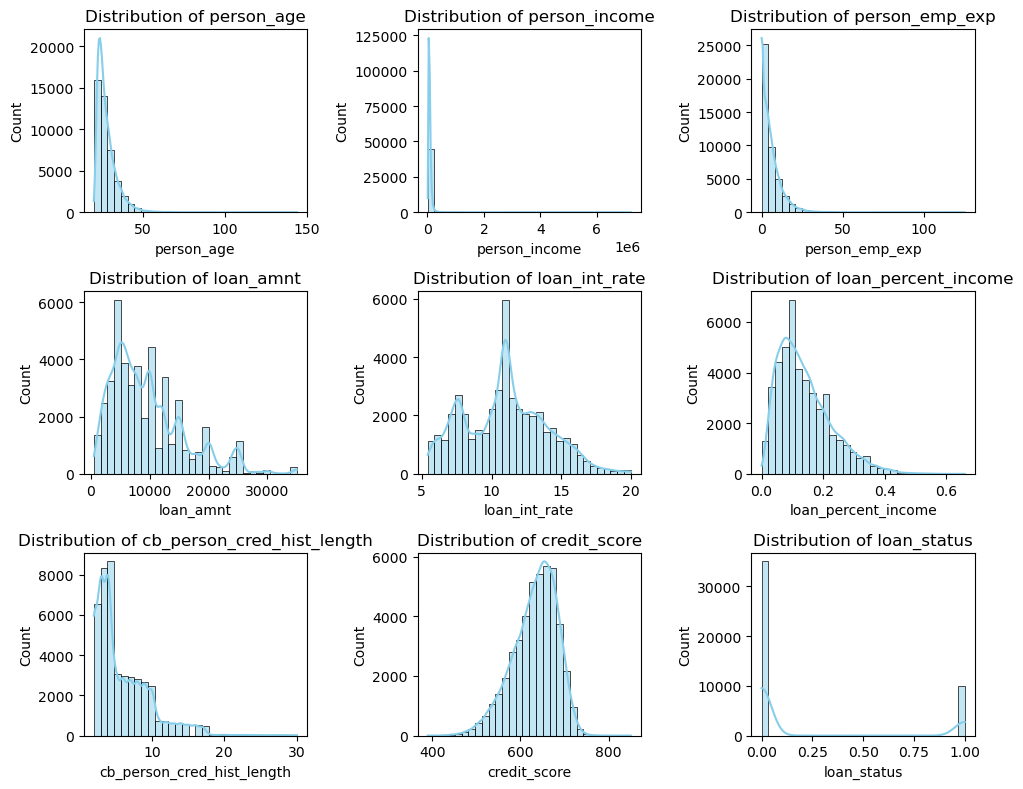

In [109]:
# List of numerical columns
numerical_cols = numerical_df.columns
# Plot distributions
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")


plt.tight_layout()
plt.show()

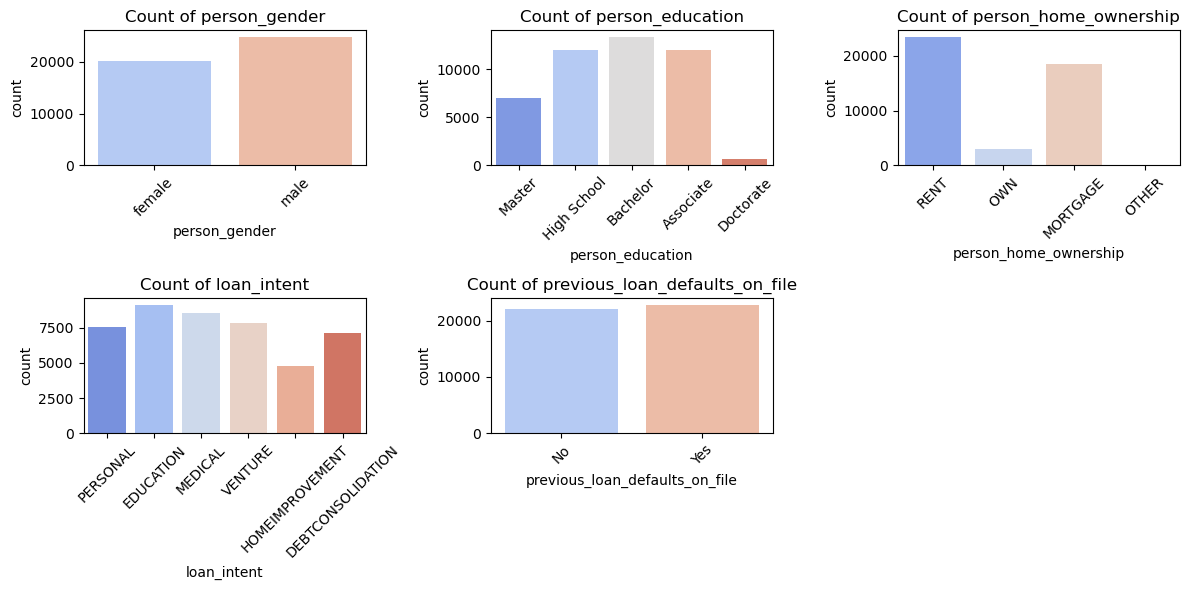

In [110]:
categorical_cols = catagorical_df.columns

plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[col], palette="coolwarm")
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


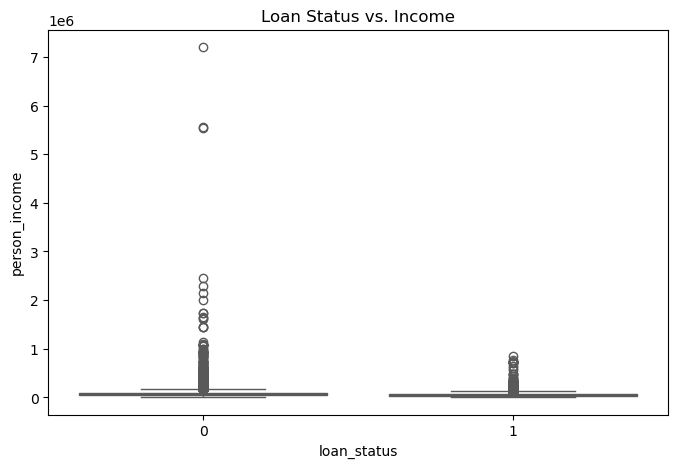

In [111]:
plt.figure(figsize=(8,5))
sns.boxplot(x="loan_status", y="person_income", data=df, palette="Set2")
plt.title("Loan Status vs. Income")
plt.show()


# Bivariate anlysis

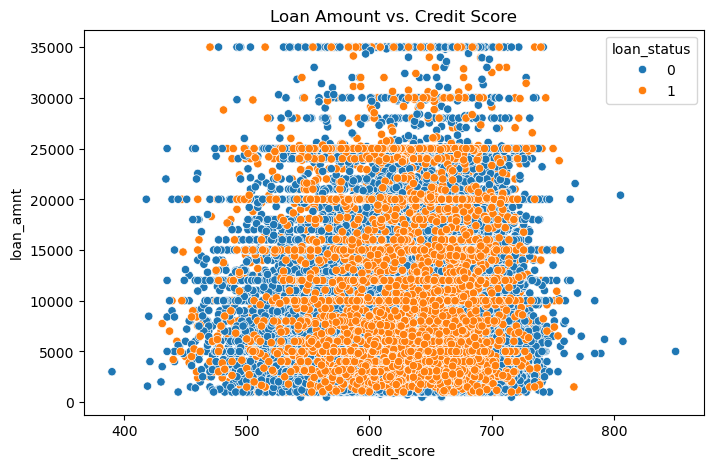

In [112]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["credit_score"], y=df["loan_amnt"], hue=df["loan_status"])
plt.title("Loan Amount vs. Credit Score")
plt.show()


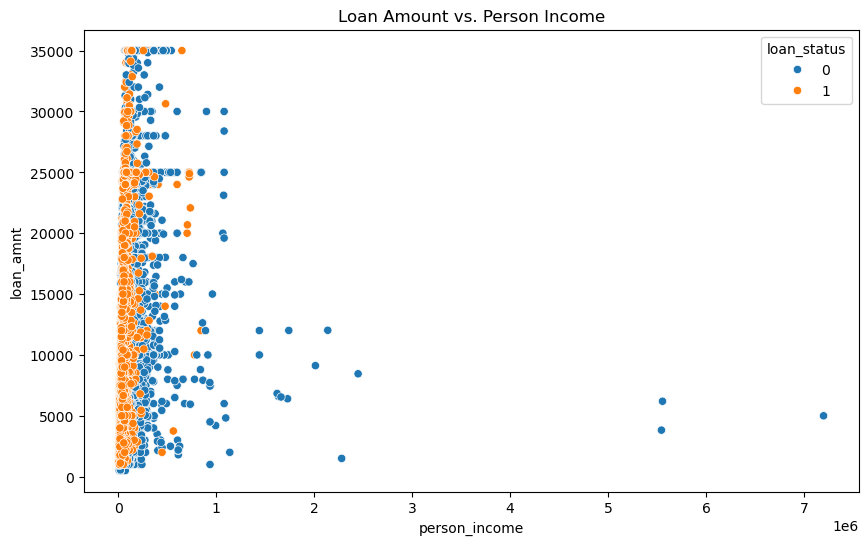

In [113]:
plt.figure(figsize= (10,6))
sns.scatterplot( x=df['person_income'], y= df['loan_amnt'], hue=df["loan_status"])
plt.title("Loan Amount vs. Person Income")
plt.show()

<Axes: xlabel='person_education', ylabel='credit_score'>

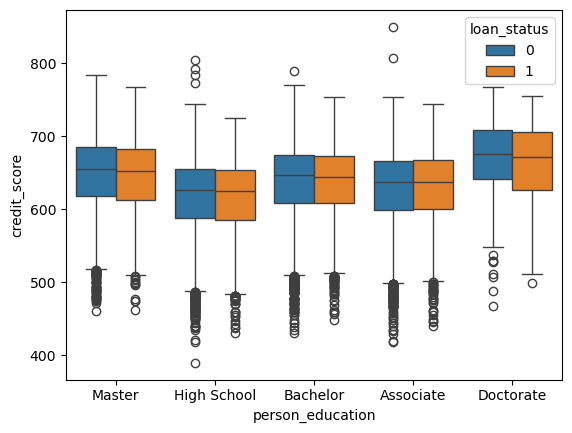

In [114]:
sns.boxplot(data=df, x= 'person_education', y= 'credit_score', hue= 'loan_status')

In [115]:
corr_matrix = numerical_df.corr()
corr_matrix

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.021476
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,-0.135808
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.020481
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,0.107714
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,0.332005
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,0.384880
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.014851
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.007647
loan_status,-0.021476,-0.135808,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,1.000000


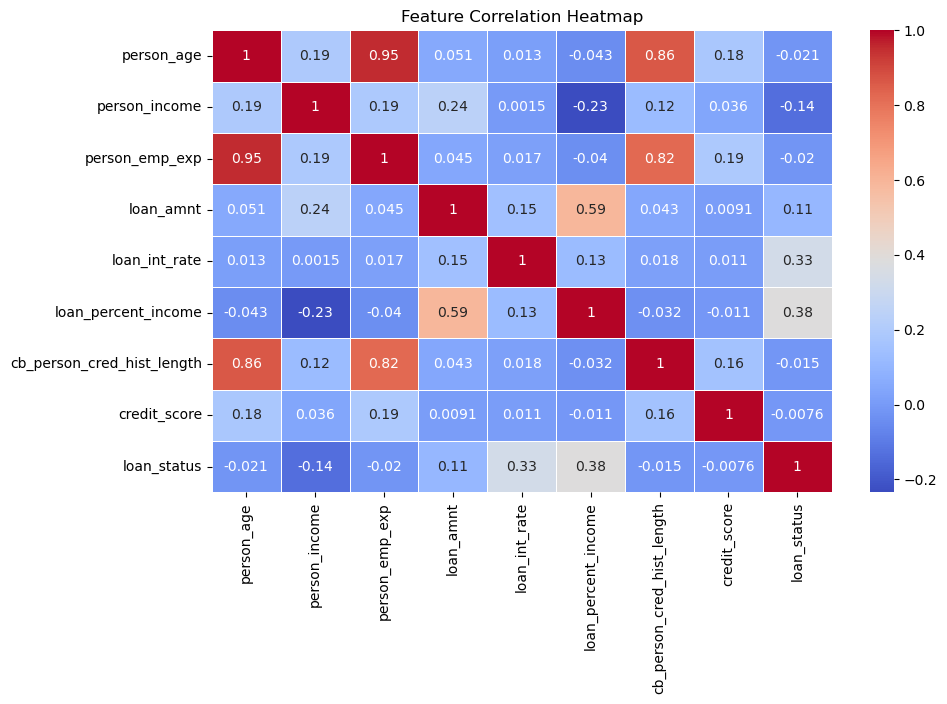

In [116]:


# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

<Axes: xlabel='loan_intent', ylabel='person_education'>

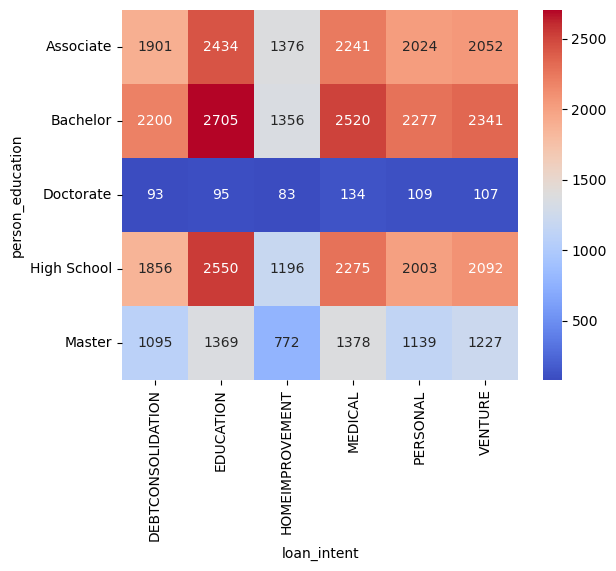

In [117]:
cross_tab = pd.crosstab(df['person_education'], df['loan_intent'])
sns.heatmap(cross_tab, annot = True, cmap= 'coolwarm', fmt='d')

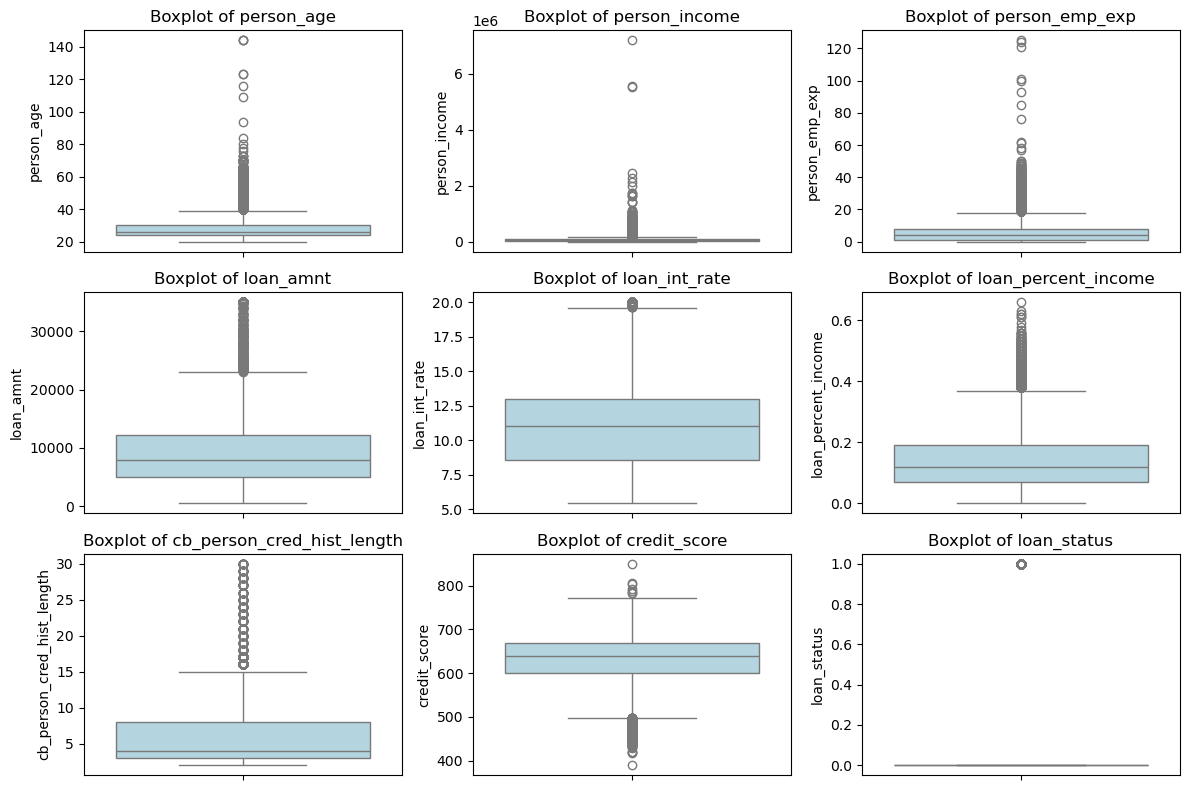

In [118]:

# Create boxplots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [119]:
def detect_outliers_with_loan_status(df, numerical_cols):
    for col in numerical_cols:
        if col == 'loan_status':
            continue  # Skip target column if present
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Get outlier rows
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        if not outliers.empty:
            print(f"\n🔺 Column '{col}' has {len(outliers)} outlier(s).")
            print(outliers[[col, 'loan_status']].head())  # show first few outliers



print(df.value_counts('loan_status')) # target column


numerical_cols = df.select_dtypes(include='number').columns  # or use your predefined list
columns_with_outliers = detect_outliers_with_loan_status(df, numerical_cols)

print("\nColumns with outliers:", columns_with_outliers)

print(df.value_counts('loan_status')) # target column


loan_status
0    35000
1    10000
Name: count, dtype: int64

🔺 Column 'person_age' has 2188 outlier(s).
       person_age  loan_status
81          144.0            0
183         144.0            0
575         123.0            0
747         123.0            0
29120        40.0            0

🔺 Column 'person_income' has 2218 outlier(s).
    person_income  loan_status
15       600891.0            0
20       195718.0            0
33       368115.0            0
34       361076.0            0
42       361293.0            0

🔺 Column 'person_emp_exp' has 1724 outlier(s).
       person_emp_exp  loan_status
81                125            0
183               121            0
575               101            0
747               100            0
29120              19            0

🔺 Column 'loan_amnt' has 2348 outlier(s).
   loan_amnt  loan_status
0    35000.0            1
3    35000.0            1
4    35000.0            1
6    35000.0            1
7    35000.0            1

🔺 Column 'loan_int_

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to numerical columns
for col in ["person_age", "person_income", "person_emp_exp", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length", "credit_score"]:
    df = remove_outliers_iqr(df, col)

print("Outliers removed using IQR method.")

In [ ]:
# Function to remove outliers using IQR

data_frame_before_removing_outliers = df
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1    
    low_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)    
    return df[(df[column]>=low_bound)&(df[column] <= upper_bound)]
   

# Apply outlier removal to numerical columns
for col in numerical_cols:
    if col == 'person_age':
        df = remove_outliers_iqr(df, col)

print("Outliers removed using IQR method.")

print(df['person_age'].max())

Outliers removed using IQR method.
<bound method Series.max of 0        22.0
1        21.0
2        25.0
3        23.0
4        24.0
         ... 
44995    27.0
44996    37.0
44997    33.0
44998    29.0
44999    24.0
Name: person_age, Length: 42423, dtype: float64>


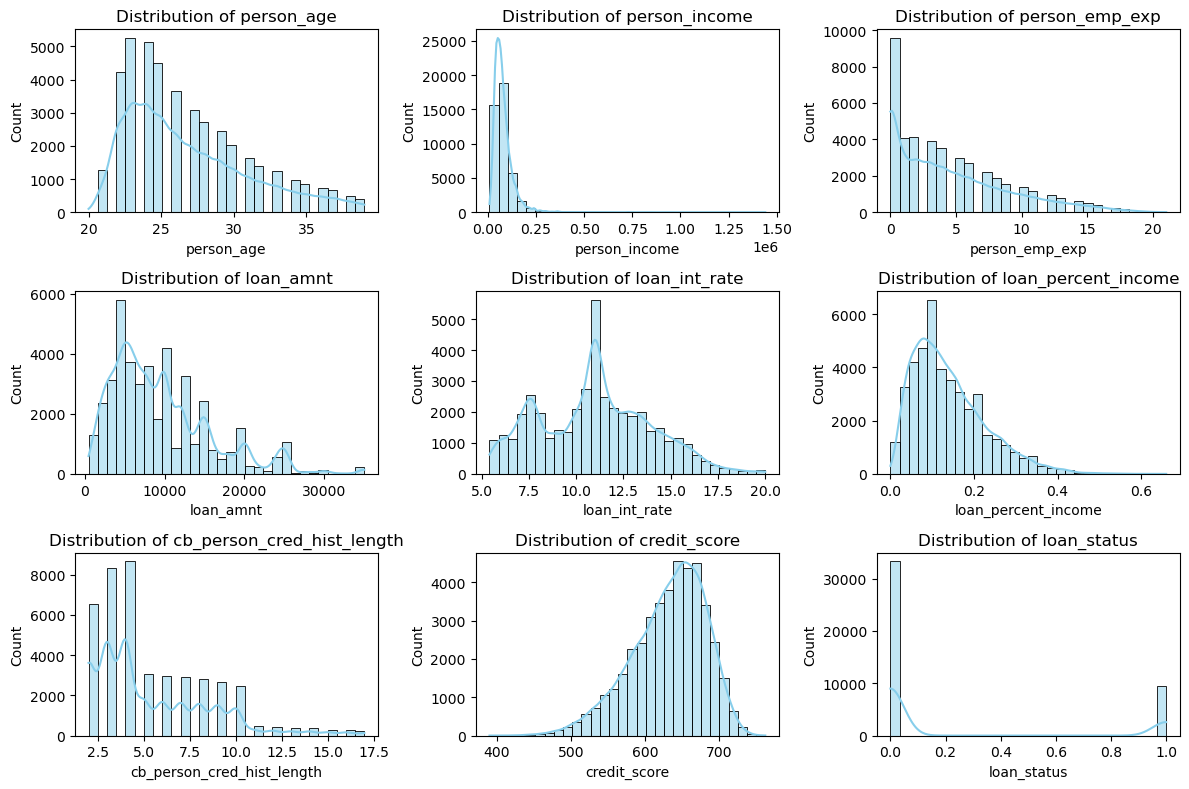

In [121]:
# boxplot outlier 
# Plot distribution of numerical features


plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

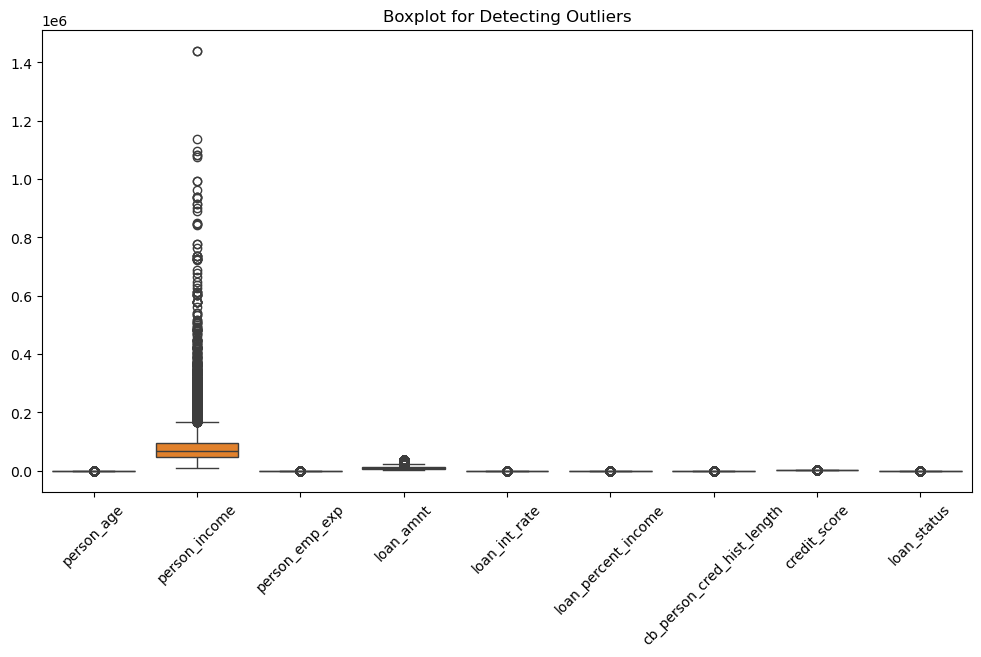

In [122]:
# Boxplots for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=["int64", "float64"]))
plt.xticks(rotation=45)
plt.title("Boxplot for Detecting Outliers")
plt.show()


In [123]:
from sklearn.preprocessing import LabelEncoder

# Instantiate label encoder
le = LabelEncoder()

# List of columns to label encode
label_encode_cols = ['person_gender', 'previous_loan_defaults_on_file']

# Apply label encoding
for col in label_encode_cols:
    df[col] = le.fit_transform(df[col])


In [124]:
# Define mappings
education_mapping = {
    'Master': 0,
    'High School': 1,
    'Bachelor': 2,
    'Associate': 3,
    'Doctorate': 4
}

home_ownership_mapping = {
    'RENT': 0,
    'OWN': 1,
    'MORTGAGE': 2,
    'OTHER': 3
}

loan_intent_mapping = {
    'EDUCATION': 0,
    'MEDICAL': 1,
    'VENTURE': 2,
    'PERSONAL': 3,
    'DEBTCONSOLIDATION': 4,
    'HOMEIMPROVEMENT': 5
}

# Store mappings in a dictionary
column_mappings = {
    'person_education': education_mapping,
    'person_home_ownership': home_ownership_mapping,
    'loan_intent': loan_intent_mapping
}

# Apply encoding dynamically
for col, mapping in column_mappings.items():
    df[col] = df[col].map(mapping)


In [125]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,0,71948.0,0,0,35000.0,3,16.02,0.49,3.0,561,0,1
1,21.0,0,1,12282.0,0,1,1000.0,0,11.14,0.08,2.0,504,1,0
2,25.0,0,1,12438.0,3,2,5500.0,1,12.87,0.44,3.0,635,0,1
3,23.0,0,2,79753.0,0,0,35000.0,1,15.23,0.44,2.0,675,0,1
4,24.0,1,0,66135.0,1,0,35000.0,1,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,3,47971.0,6,0,15000.0,1,15.66,0.31,3.0,645,0,1
44996,37.0,0,3,65800.0,17,0,9000.0,5,14.07,0.14,11.0,621,0,1
44997,33.0,1,3,56942.0,7,0,2771.0,4,10.02,0.05,10.0,668,0,1
44998,29.0,1,2,33164.0,4,0,12000.0,0,13.23,0.36,6.0,604,0,1


In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [127]:
X = df.drop("loan_status", axis=1)  # Drop the target column to get features
y = df["loan_status"]               # Target variable

In [128]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [129]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
 #Initialize the model


In [130]:
rf_model.fit(X_train, y_train) #Train the model


RandomForestClassifier(class_weight='balanced', random_state=42)

In [131]:
y_pred = rf_model.predict(X_test) # Make Predictions


In [132]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [133]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9296975359103118

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      6656
           1       0.91      0.76      0.83      1907

    accuracy                           0.93      8563
   macro avg       0.92      0.87      0.89      8563
weighted avg       0.93      0.93      0.93      8563


Confusion Matrix:
 [[6517  139]
 [ 463 1444]]


In [134]:
import joblib

# Save your Random Forest model
joblib.dump(rf_model, 'loan_prediction_model.pkl')



['loan_prediction_model.pkl']

In [135]:
model_columns = X.columns.tolist()  # NOT df.columns
joblib.dump(model_columns, 'model_columns.pkl')

['model_columns.pkl']

In [136]:
print(df.columns.tolist())

['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status']
